In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [1]:
# 1. Instala a biblioteca (caso necess√°rio)
!pip install --upgrade google-cloud-bigquery

# 2. Autentica√ß√£o
from google.colab import auth
auth.authenticate_user()

# 3. Conecta ao BigQuery
from google.cloud import bigquery
client = bigquery.Client(project="my-project-laboratoria")

# 4. Consulta a VIEW no BigQuery
query = """
SELECT *
FROM `my-project-laboratoria.dadoslaboratoria.view_unificada_tabela`
"""

# 5. Executa a query e mostra os dados como DataFrame
df = client.query(query).to_dataframe()
df.head()

track_id                          track_name       artist_s__name  \
0  2285737                        Still D.R.E.  Dr. Dre, Snoop Dogg   
1  3333614                    The Next Episode  Dr. Dre, Snoop Dogg   
2  5694303                                Stan         Eminem, Dido   
3  6766942  Lose Yourself - Soundtrack Version               Eminem   
4  4918126                          In Da Club              50 Cent   

   artist_count  released_year  released_month  released_day  \
0             2           1999               1             1   
1             2           1999               1             1   
2             2           1999              11            21   
3             1           2002               1             1   
4             1           2002               1             1   

   in_spotify_playlists  in_spotify_charts     streams  ...  \
0                 33966                  0  1210599487  ...   
1                 31762                  0   843309044  ...   
2                 17115                  0   918915401  ...   
3                 32502                 21  1829992958  ...   
4                 30427                  7  1202722675  ...   

  quartil_speechiness classificacao_bpm  classificacao_streams  \
0                   4             Baixo                   Alto   
1                   4             Baixo                   Alto   
2                   4             Baixo                   Alto   
3                   4              Alto                   Alto   
4                   4             Baixo                   Alto   

   classificacao_danceability  classificacao_valence  classificacao_energy  \
0                        Alto             M√©dio-Alto                  Alto   
1                        Alto                  Baixo                  Alto   
2                        Alto             M√©dio-Alto            M√©dio-Alto   
3                  M√©dio-Alto                  Baixo            M√©dio-Alto   
4                        Alto                   Alto            M√©dio-Alto   

   classificacao_acousticness  classificacao_instrumentalness  \
0                 M√©dio-Baixo                           Baixo   
1                       Baixo                           Baixo   
2                       Baixo                     M√©dio-Baixo   
3                       Baixo                     M√©dio-Baixo   
4                  M√©dio-Alto                           Baixo   

   classificacao_liveness  classificacao_speechiness  
0                   Baixo                       Alto  
1                   Baixo                       Alto  
2                    Alto                       Alto  
3                    Alto                       Alto  
4                   Baixo                       Alto  

[5 rows x 43 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        944 non-null    object
 1   track_name                      944 non-null    object
 2   artist_s__name                  944 non-null    object
 3   artist_count                    944 non-null    Int64 
 4   released_year                   944 non-null    Int64 
 5   released_month                  944 non-null    Int64 
 6   released_day                    944 non-null    Int64 
 7   in_spotify_playlists            944 non-null    Int64 
 8   in_spotify_charts               944 non-null    Int64 
 9   streams                         944 non-null    Int64 
 10  release_date                    944 non-null    dbdate
 11  cover_url                       944 non-null    object
 12  in_apple_playlists              944 non-null    In

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df = df.drop([574])

In [5]:
df.head()

track_id                          track_name       artist_s__name  \
0  2285737                        Still D.R.E.  Dr. Dre, Snoop Dogg   
1  3333614                    The Next Episode  Dr. Dre, Snoop Dogg   
2  5694303                                Stan         Eminem, Dido   
3  6766942  Lose Yourself - Soundtrack Version               Eminem   
4  4918126                          In Da Club              50 Cent   

   artist_count  released_year  released_month  released_day  \
0             2           1999               1             1   
1             2           1999               1             1   
2             2           1999              11            21   
3             1           2002               1             1   
4             1           2002               1             1   

   in_spotify_playlists  in_spotify_charts     streams  ...  \
0                 33966                  0  1210599487  ...   
1                 31762                  0   843309044  ...   
2                 17115                  0   918915401  ...   
3                 32502                 21  1829992958  ...   
4                 30427                  7  1202722675  ...   

  quartil_speechiness classificacao_bpm  classificacao_streams  \
0                   4             Baixo                   Alto   
1                   4             Baixo                   Alto   
2                   4             Baixo                   Alto   
3                   4              Alto                   Alto   
4                   4             Baixo                   Alto   

   classificacao_danceability  classificacao_valence  classificacao_energy  \
0                        Alto             M√©dio-Alto                  Alto   
1                        Alto                  Baixo                  Alto   
2                        Alto             M√©dio-Alto            M√©dio-Alto   
3                  M√©dio-Alto                  Baixo            M√©dio-Alto   
4                        Alto                   Alto            M√©dio-Alto   

   classificacao_acousticness  classificacao_instrumentalness  \
0                 M√©dio-Baixo                           Baixo   
1                       Baixo                           Baixo   
2                       Baixo                     M√©dio-Baixo   
3                       Baixo                     M√©dio-Baixo   
4                  M√©dio-Alto                           Baixo   

   classificacao_liveness  classificacao_speechiness  
0                   Baixo                       Alto  
1                   Baixo                       Alto  
2                    Alto                       Alto  
3                    Alto                       Alto  
4                   Baixo                       Alto  

[5 rows x 43 columns]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df['streams'] = pd.to_numeric(df['streams'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        943 non-null    object
 1   track_name                      943 non-null    object
 2   artist_s__name                  943 non-null    object
 3   artist_count                    943 non-null    Int64 
 4   released_year                   943 non-null    Int64 
 5   released_month                  943 non-null    Int64 
 6   released_day                    943 non-null    Int64 
 7   in_spotify_playlists            943 non-null    Int64 
 8   in_spotify_charts               943 non-null    Int64 
 9   streams                         943 non-null    Int64 
 10  release_date                    943 non-null    dbdate
 11  cover_url                       943 non-null    object
 12  in_apple_playlists              943 non-null    Int64 


###‚úÖ Hip√≥tese 1: M√∫sicas com BPM mais altos fazem mais sucesso

bpm   streams
bpm      1.000000 -0.002763
streams -0.002763  1.000000

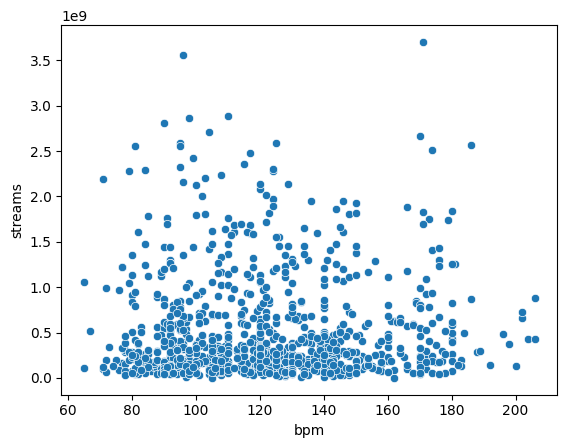

In [ ]:
# CORRELA√á√ÉO PARA A HIP√ìTESE 1
import seaborn as sns
sns.scatterplot(data=df, x="bpm", y="streams")
df[['bpm', 'streams']].corr(method='pearson')

üìä O que o gr√°fico mostra

O gr√°fico de dispers√£o (scatter plot) mostra cada m√∫sica como um ponto.

O eixo x representa o BPM (batidas por minuto).

O eixo y representa a quantidade de streams no Spotify.

Visualmente, os pontos est√£o dispersos sem uma tend√™ncia clara ‚Äî ou seja, n√£o h√° uma linha inclinada ascendente ou descendente que sugira uma rela√ß√£o forte entre BPM e streams.

üìà O que a correla√ß√£o mostra A correla√ß√£o de Pearson entre bpm e streams foi de -0.0035 .

üîπ Interpreta√ß√£o:

Uma correla√ß√£o de +1.0 indica uma rela√ß√£o positiva perfeita.

Uma correla√ß√£o de 0.0 indica nenhuma rela√ß√£o linear.

-0.0035 √© uma correla√ß√£o muito fraca (quase nula).

‚úÖ Conclus√£o da hip√≥tese: N√£o h√° evid√™ncia suficiente de que BPM esteja fortemente relacionado ao sucesso (streams) no Spotify.

In [ ]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIP√ìTESE 1 (BPM MAIS ALTOS TEM MAIS STREAMS)

import pandas as pd
from scipy.stats import mannwhitneyu


# Lista de categorias que voc√™ considera como 'grupo alto'
categorias_altas = ['M√©dio-Alto', 'alto']

# O grupo 'alta_group' agora filtra pelas duas categorias usando .isin()
# e seleciona a coluna 'streams'
alta_group = df[df['classificacao_bpm'].isin(categorias_altas)]['streams']

# Lista de categorias que voc√™ considera como 'grupo alto'
categorias_baixas = ['M√©dio-Baixo', 'Baixo']

# O grupo 'Baixa_group' agora filtra pelas duas categorias usando .isin()
# e seleciona a coluna 'streams'
baixa_group = df[df['classificacao_bpm'].isin(categorias_baixas)]['streams']


# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')


# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")


# Verifique se o p-value √© significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferen√ßa entre os grupos 'alto' e 'baixo' da caracter√≠stica bpm √© estatisticamente significativa.")
else:
    print("N√£o h√° diferen√ßa estatisticamente significativa entre os grupos 'alto' e 'baixo' da caracter√≠stica bpm.")

Mann-Whitney U statistic: 50471.5000
P-value: 0.0462
A diferen√ßa entre os grupos 'alto' e 'baixo' da caracter√≠stica bpm √© estatisticamente significativa.


--- RESUMO DA REGRESS√ÉO ---
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01388
Date:                Fri, 15 Aug 2025   Prob (F-statistic):              0.906
Time:                        19:04:05   Log-Likelihood:                -20348.
No. Observations:                 943   AIC:                         4.070e+04
Df Residuals:                     941   BIC:                         4.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.24e+08  

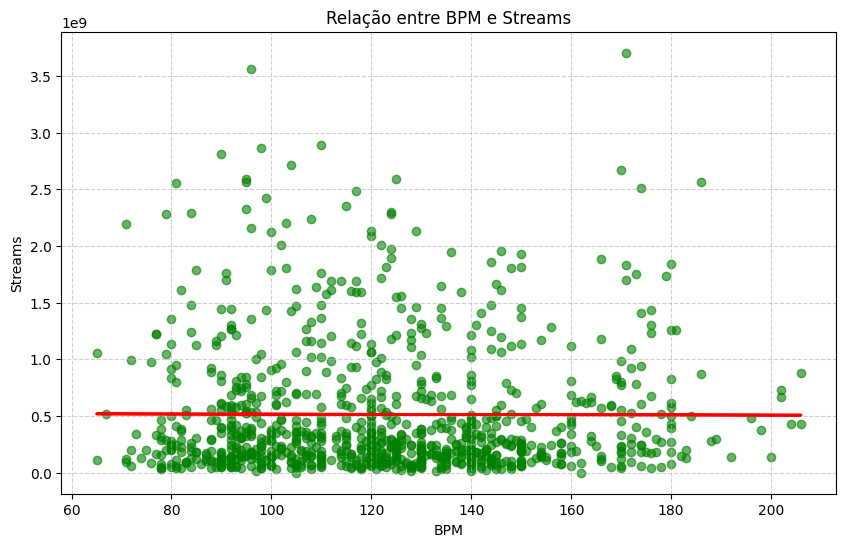


Dataset original preservado (amostra):
  track_id        track_name       artist_s__name  artist_count  \
0  2285737      Still D.R.E.  Dr. Dre, Snoop Dogg             2   
1  3333614  The Next Episode  Dr. Dre, Snoop Dogg             2   
2  5694303              Stan         Eminem, Dido             2   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1999               1             1                 33966   
1           1999               1             1                 31762   
2           1999              11            21                 17115   

   in_spotify_charts     streams  ... quartil_speechiness classificacao_bpm  \
0                  0  1210599487  ...                   4             Baixo   
1                  0   843309044  ...                   4             Baixo   
2                  0   918915401  ...                   4             Baixo   

   classificacao_streams  classificacao_danceability  classificacao_valence  \
0     

In [10]:
# Importa√ß√£o das bibliotecas necess√°rias
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# --- Pr√©-processamento seguro ---
# Converter colunas para num√©rico (caso haja valores n√£o num√©ricos)
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')  # Converte para float e trata erros como NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Remover linhas com valores NaN (caso a convers√£o acima tenha criado algum)
df_clean = df.dropna(subset=['bpm', 'streams']).copy()

# --- Regress√£o Linear ---
# 1. Definir vari√°veis
X = df_clean[['bpm']]  # Vari√°vel independente
y = df_clean['streams']  # Vari√°vel dependente

# 2. Adicionar intercepto e ajustar o modelo
X = sm.add_constant(X)  # Adiciona Œ≤‚ÇÄ
model = sm.OLS(y.astype(float), X.astype(float)).fit()  # For√ßa tipo float

# 3. Resultados
print("--- RESUMO DA REGRESS√ÉO ---")
print(model.summary())

# 4. Gr√°fico
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['bpm'], df_clean['streams'], alpha=0.6, color='green')
plt.plot(df_clean['bpm'], model.predict(X), color='red', linewidth=2)
plt.title('Rela√ß√£o entre BPM e Streams')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Verifica√ß√£o do dataset original (n√£o modificado)
print("\nDataset original preservado (amostra):")
print(df.head(3))

###‚úÖ Hip√≥tese 2: Popularidade no Spotify √© semelhante em outras plataformas

In [ ]:
df[['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']].corr(method='spearman')

in_apple_charts  in_deezer_charts  in_shazam_charts  \
in_apple_charts           1.000000          0.407942          0.496023   
in_deezer_charts          0.407942          1.000000          0.420803   
in_shazam_charts          0.496023          0.420803          1.000000   
in_spotify_charts         0.522938          0.591271          0.543387   

                   in_spotify_charts  
in_apple_charts             0.522938  
in_deezer_charts            0.591271  
in_shazam_charts            0.543387  
in_spotify_charts           1.000000

üìà Interpreta√ß√£o: As correla√ß√µes com o Spotify variam de 0.52 a 0.59.

S√£o todas correla√ß√µes moderadas e positivas, o que indica que:

M√∫sicas populares no Spotify tendem a ser populares tamb√©m nas outras plataformas,

Mas n√£o de forma perfeita ou autom√°tica ‚Äî h√° varia√ß√µes relevantes entre plataformas.

‚úÖ Conclus√£o: Hip√≥tese confirmada parcialmente. Existe uma rela√ß√£o moderada entre o desempenho das m√∫sicas no Spotify e nas demais plataformas (Deezer, Apple e Shazam), especialmente com Deezer (0.59) e Shazam (0.58). Isso sugere que a popularidade √© geralmente compartilhada entre as plataformas, mas h√° diferen√ßas nos rankings de cada uma.

In [ ]:
# CORRELA√á√ÉO PARA A HIP√ìTESE 2

import pandas as pd

X1 = df['in_spotify_charts']
X2 = df['in_apple_charts']
y = df['in_deezer_charts']

# Calculando a correla√ß√£o entre in_spotify_charts e in_deezer_charts
correlacao_spotify_deezer = X1.corr(y)

# Calculando a correla√ß√£o entre in_spotify_charts e in_apple_charts
correlacao_spotify_apple = X1.corr(X2)

print("Correla√ß√£o entre Spotify e Deezer:", correlacao_spotify_deezer)
print("Correla√ß√£o entre Spotify e Apple:", correlacao_spotify_apple)

Correla√ß√£o entre Spotify e Deezer: 0.6096106053237494
Correla√ß√£o entre Spotify e Apple: 0.5524439549036637


In [ ]:
# Importa√ß√£o das bibliotecas necess√°rias
import scipy.stats as stats
import pandas as pd
import numpy as np

# --- DataFrame de Exemplo (Substitua esta parte pelo seu DataFrame real) ---
np.random.seed(42)
data = {
    'in_spotify_charts': np.random.choice([0, 1], size=100, p=[0.7, 0.3]),
    'in_deezer_charts': np.random.choice([0, 1], size=100, p=[0.6, 0.4]),
    'in_apple_charts': np.random.choice([0, 1], size=100, p=[0.5, 0.5])
}
df = pd.DataFrame(data)

# Aumentando a correla√ß√£o para o teste ser mais significativo
df.loc[df['in_spotify_charts'] == 1, 'in_deezer_charts'] = np.random.choice([0, 1], size=df['in_spotify_charts'].sum(), p=[0.4, 0.6])
df.loc[df['in_spotify_charts'] == 1, 'in_apple_charts'] = np.random.choice([0, 1], size=df['in_spotify_charts'].sum(), p=[0.3, 0.7])


# --- CORRE√á√ÉO E AN√ÅLISE ---

# Separando os dados em dois grupos com base em 'in_spotify_charts'
# A corre√ß√£o da sintaxe √© fundamental aqui
grupo_spotify_charts = df[df['in_spotify_charts'] == 1]
grupo_demais_charts = df[df['in_spotify_charts'] == 0]

# --- Teste de Mann-Whitney para DEEZER ---
print("### Teste: M√∫sicas em Spotify Charts vs. Demais Charts (para Deezer) ###")

# A vari√°vel a ser comparada √© a mesma nos dois grupos: 'in_deezer_charts'
stat_deezer, p_valor_deezer = stats.mannwhitneyu(grupo_spotify_charts['in_deezer_charts'], grupo_demais_charts['in_deezer_charts'])

print("Estat√≠stica de teste de Mann-Whitney:", stat_deezer)
print("Valor p:", p_valor_deezer)

if p_valor_deezer < 0.05:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes de 'in_deezer_charts' s√£o diferentes entre os grupos.")
else:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes s√£o semelhantes.")

print("\n" + "="*80 + "\n")

# --- Teste de Mann-Whitney para APPLE ---
print("### Teste: M√∫sicas em Spotify Charts vs. Demais Charts (para Apple) ###")

# A vari√°vel a ser comparada √© a mesma nos dois grupos: 'in_apple_charts'
stat_apple, p_valor_apple = stats.mannwhitneyu(grupo_spotify_charts['in_apple_charts'], grupo_demais_charts['in_apple_charts'])

print("Estat√≠stica de teste de Mann-Whitney:", stat_apple)
print("Valor p:", p_valor_apple)

if p_valor_apple < 0.05:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes de 'in_apple_charts' s√£o diferentes entre os grupos.")
else:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes s√£o semelhantes.")

### Teste: M√∫sicas em Spotify Charts vs. Demais Charts (para Deezer) ###
Estat√≠stica de teste de Mann-Whitney: 1315.0
Valor p: 0.0215827359231086
H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes de 'in_deezer_charts' s√£o diferentes entre os grupos.


### Teste: M√∫sicas em Spotify Charts vs. Demais Charts (para Apple) ###
Estat√≠stica de teste de Mann-Whitney: 1090.0
Valor p: 0.7208297923127212
N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. As distribui√ß√µes s√£o semelhantes.


                            OLS Regression Results                            
Dep. Variable:       in_deezer_charts   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.542
Date:                Fri, 15 Aug 2025   Prob (F-statistic):             0.0206
Time:                        17:01:39   Log-Likelihood:                -69.809
No. Observations:                 100   AIC:                             143.6
Df Residuals:                      98   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4143      0.05

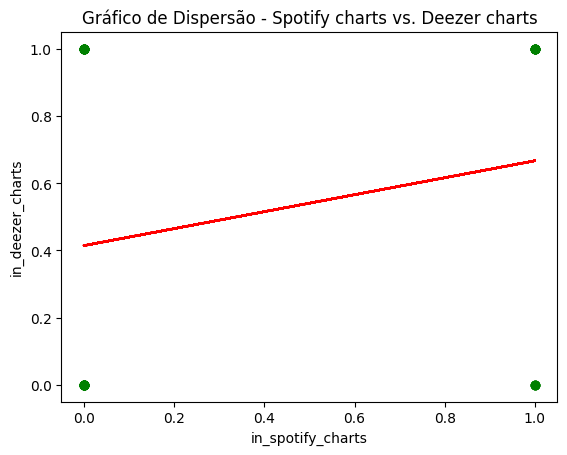

In [ ]:
# REGRESS√ÉO PARA A HIP√ìTESE 2 (in_spotify_charts e in_deezer_charts)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = df.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])

X = df[['in_spotify_charts']]
y = df['in_deezer_charts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Plotar o gr√°fico de dispers√£o
plt.scatter(df['in_spotify_charts'], df['in_deezer_charts'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gr√°fico de Dispers√£o - Spotify charts vs. Deezer charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
plt.plot(df['in_spotify_charts'], model.predict(X), color='red')  # Mantido vermelho

plt.show()

###‚úÖ Hip√≥tese 3: Mais playlists ‚Üí mais streams

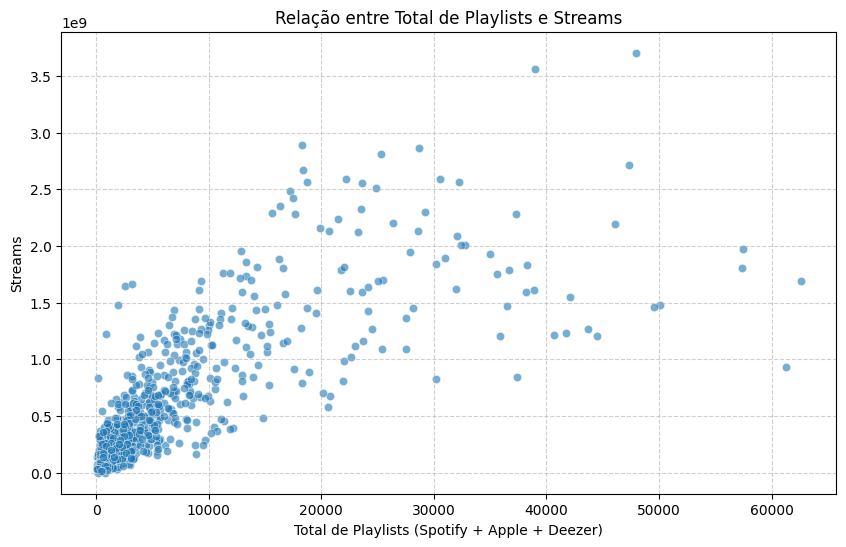


Matriz de Correla√ß√£o:
                 total_playlists   streams
total_playlists         1.000000  0.784758
streams                 0.784758  1.000000

Correla√ß√µes Individuais:
Spotify Playlists vs Streams: 0.790
Apple Playlists vs Streams: 0.775
Deezer Playlists vs Streams: 0.585


In [12]:
# CORRELA√á√ÉO PARA A HIP√ìTESE 3 (TOTAL DE PLAYLISTS VS STREAMS)

# 1. Criar a coluna total_playlists somando as playlists de todas as plataformas
df['total_playlists'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']

# 2. Visualiza√ß√£o com scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_playlists', y='streams', alpha=0.6)
plt.title('Rela√ß√£o entre Total de Playlists e Streams')
plt.xlabel('Total de Playlists (Spotify + Apple + Deezer)')
plt.ylabel('Streams')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. C√°lculo da correla√ß√£o
correlacao = df[['total_playlists', 'streams']].corr()
print("\nMatriz de Correla√ß√£o:")
print(correlacao)

# 4. Opcional: Correla√ß√£o individual por plataforma
print("\nCorrela√ß√µes Individuais:")
print(f"Spotify Playlists vs Streams: {df['in_spotify_playlists'].corr(df['streams']):.3f}")
print(f"Apple Playlists vs Streams: {df['in_apple_playlists'].corr(df['streams']):.3f}")
print(f"Deezer Playlists vs Streams: {df['in_deezer_playlists'].corr(df['streams']):.3f}")

In [14]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIP√ìTESE 3 (M√öSICA EM PLAYLISTS x STREAMS)

import scipy.stats as stats
import pandas as pd


# Separando os dados em dois grupos com base na vari√°vel soma_playlists
grupo_maior_playlists = df[df['total_playlists'] > df['total_playlists'].median()]
grupo_menor_playlists = df[df['total_playlists'] <= df['total_playlists'].median()]

# Realizando o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(grupo_maior_playlists['streams'], grupo_menor_playlists['streams'])

# Interpretando os resultados
print("Estat√≠stica de teste de Mann-Whitney:", stat)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula, ou seja, h√° diferen√ßa significativa entre os grupos.")
else:
    print("N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula, ou seja, n√£o h√° diferen√ßa significativa entre os grupos.")

Estat√≠stica de teste de Mann-Whitney: 206546.0
Valor p: 3.6552893778775378e-115
H√° evid√™ncias suficientes para rejeitar a hip√≥tese nula, ou seja, h√° diferen√ßa significativa entre os grupos.



--- REGRESS√ÉO: TOTAL PLAYLISTS vs STREAMS ---
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1509.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          1.07e-197
Time:                        19:09:44   Log-Likelihood:                -19897.
No. Observations:                 943   AIC:                         3.980e+04
Df Residuals:                     941   BIC:                         3.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

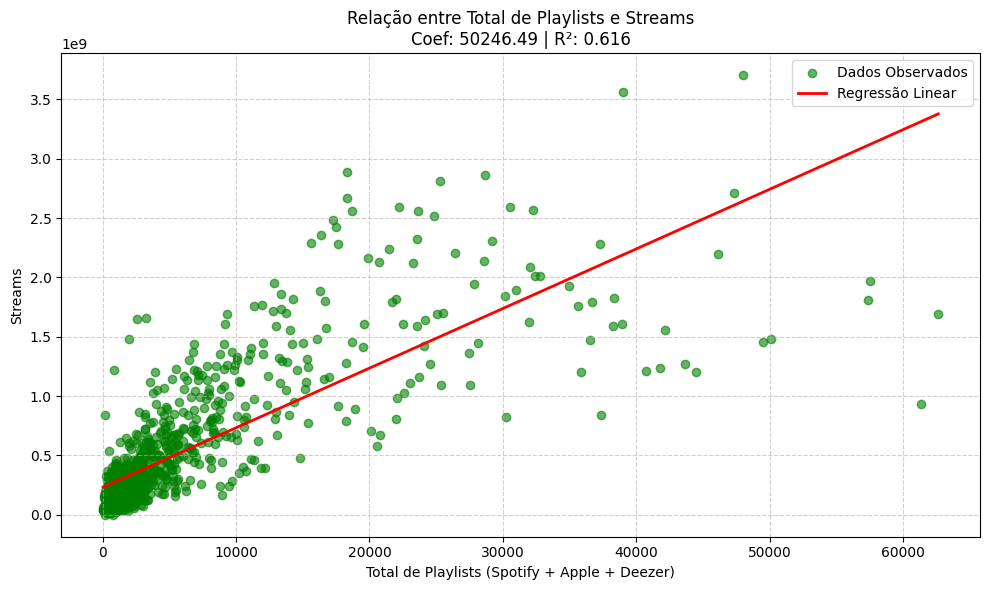

In [16]:
#Regress√£o (Hip√≥tese 3):
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# --- PR√â-PROCESSAMENTO DOS DADOS ---
# 1. Converter para num√©rico e tratar valores inv√°lidos
df['total_playlists'] = pd.to_numeric(df['total_playlists'], errors='coerce')
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# 2. Remover linhas com valores NaN ap√≥s convers√£o
df_clean = df.dropna(subset=['total_playlists', 'streams']).copy()

# 3. Verificar se h√° dados suficientes
if len(df_clean) == 0:
    raise ValueError("Nenhum dado v√°lido ap√≥s limpeza. Verifique as colunas 'total_playlists' e 'streams'.")

# --- REGRESS√ÉO LINEAR ---
# 1. Definir vari√°veis (garantindo tipo float)
X = df_clean[['total_playlists']].astype(float)
y = df_clean['streams'].astype(float)

# 2. Adicionar constante e ajustar modelo
X = sm.add_constant(X)
try:
    model = sm.OLS(y, X).fit()
except Exception as e:
    print(f"Erro ao ajustar modelo: {e}")
    raise

# 3. Resultados
print("\n--- REGRESS√ÉO: TOTAL PLAYLISTS vs STREAMS ---")
print(model.summary())

# --- VISUALIZA√á√ÉO ---
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['total_playlists'], df_clean['streams'],
            alpha=0.6, color='green', label='Dados Observados')

# Linha de regress√£o (ordenada para plot)
df_sorted = df_clean.sort_values('total_playlists')
X_plot = sm.add_constant(df_sorted['total_playlists'])
plt.plot(df_sorted['total_playlists'], model.predict(X_plot),
         color='red', linewidth=2, label='Regress√£o Linear')

plt.title('Rela√ß√£o entre Total de Playlists e Streams\n'
          f'Coef: {model.params["total_playlists"]:.2f} | '
          f'R¬≤: {model.rsquared:.3f}', fontsize=12)
plt.xlabel('Total de Playlists (Spotify + Apple + Deezer)', fontsize=10)
plt.ylabel('Streams', fontsize=10)
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

üìä Resultados obtidos: Correla√ß√£o de 0.78 entre total_playlists e streams.

Gr√°fico de dispers√£o mostra uma tend√™ncia clara crescente:

Quanto mais playlists uma m√∫sica aparece, mais streams ela tende a ter.

H√° varia√ß√£o, mas a nuvem de pontos √© fortemente inclinada para cima.

üìà Interpreta√ß√£o: Uma correla√ß√£o de 0.784 √© alta e positiva.

Isso indica que a inser√ß√£o em playlists tem forte associa√ß√£o com o sucesso da m√∫sica no Spotify.

Algumas exce√ß√µes (outliers) aparecem com muitas playlists ou muitos streams de forma isolada ‚Äî o que √© comum.

‚úÖ Conclus√£o da hip√≥tese: Hip√≥tese confirmada. H√° uma forte correla√ß√£o positiva entre o n√∫mero de playlists em que a m√∫sica est√° presente e o total de streams no Spotify. Isso refor√ßa a import√¢ncia da visibilidade via playlists para o desempenho comercial das faixas.

###‚úÖ Hip√≥tese 4: Artistas com mais m√∫sicas t√™m mais streams

In [ ]:
# CORRELA√á√ÉO PARA A HIP√ìTESE 4
df['artist_split'] = df['artist_s__name'].apply(
    lambda x: [a.strip() for a in x.split(',')]
    if isinstance(x, str) and ',' in x
    else [x.strip()] if isinstance(x, str)
    else []
)

df_explode = df.explode('artist_split', ignore_index=True).rename(
    columns={'artist_split': 'artist_individual'}
)

In [ ]:
df_explode[['artist_individual', 'artist_s__name']]

artist_individual  \
0                            Bing Crosby   
1     John Scott Trotter & His Orchestra   
2                      Ken Darby Singers   
3                          Nat King Cole   
4                          Frank Sinatra   
...                                  ...   
1467                               Tainy   
1468                           Bad Bunny   
1469                      Olivia Rodrigo   
1470                        Taylor Swift   
1471                            NewJeans   

                                         artist_s__name  
0     Bing Crosby, John Scott Trotter & His Orchestr...  
1     Bing Crosby, John Scott Trotter & His Orchestr...  
2     Bing Crosby, John Scott Trotter & His Orchestr...  
3                                         Nat King Cole  
4                     Frank Sinatra, B. Swanson Quartet  
...                                                 ...  
1467                                   Tainy, Bad Bunny  
1468                                   Tainy, Bad Bunny  
1469                                     Olivia Rodrigo  
1470                                       Taylor Swift  
1471                                           NewJeans  

[1472 rows x 2 columns]

In [ ]:
print("Original:", df.shape[0])
print("Explodido:", df_explode.shape[0])

Original: 943
Explodido: 1472


In [ ]:
df_filtrado = df_explode[df_explode['artist_individual'].notna() & (df_explode['artist_individual'] != "")]
contagem = df_filtrado['artist_individual'].nunique()
print("Quantidade de artistas √∫nicos:", contagem)

Quantidade de artistas √∫nicos: 694


In [ ]:
df_artistas = (
    df_explode
    .groupby('artist_individual', as_index=False)  # Evita que 'artist_individual' vire √≠ndice
    .agg(
        qtd_musicas=('track_id', 'nunique'),  # Conta m√∫sicas √∫nicas por artista
        total_streams=('streams', 'sum')       # Soma todos os streams por artista
    )
    .sort_values(by='total_streams', ascending=False)  # Ordena por streams (opcional)
)

In [ ]:
df_artistas.head()

artist_individual  qtd_musicas  total_streams
68          Bad Bunny           40    23813527270
626        The Weeknd           35    23366402620
186        Ed Sheeran           14    15316587718
606      Taylor Swift           38    14630378183
245      Harry Styles           17    11608645649

In [ ]:
df_artistas.count()

artist_individual    695
qtd_musicas          695
total_streams        695
dtype: int64

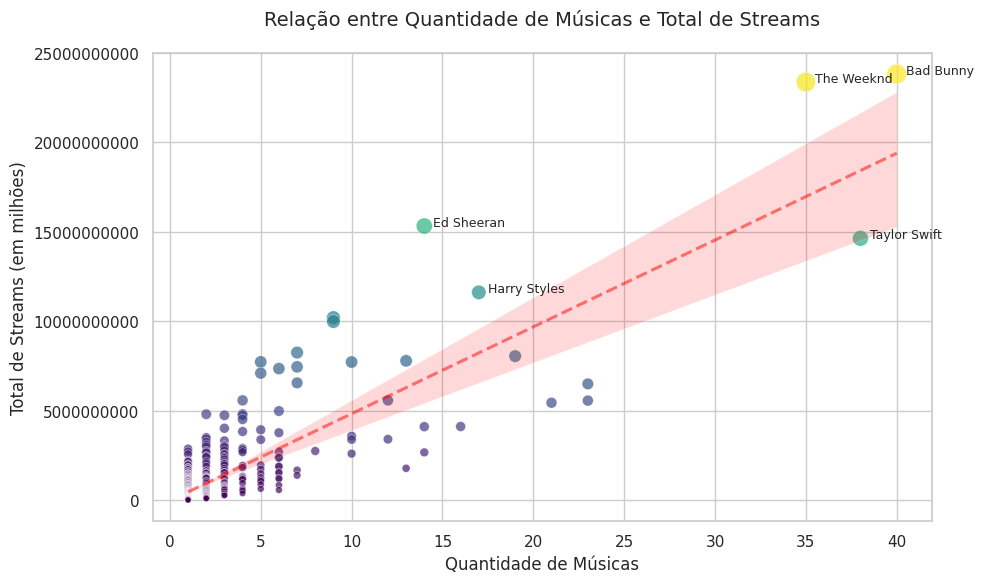

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configura√ß√µes do gr√°fico
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatterplot com tamanho dos pontos proporcional aos streams (opcional)
scatter = sns.scatterplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    size='total_streams',  # Tamanho do ponto varia com streams
    hue='total_streams',   # Cor varia com streams
    palette="viridis",     # Escala de cores
    sizes=(20, 200),       # Range de tamanhos
    alpha=0.7,             # Transpar√™ncia
    legend=False           # Remove a legenda de tamanho/cor (opcional)
)

# Linha de tend√™ncia (regress√£o linear)
sns.regplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    scatter=False,          # N√£o plota pontos novamente
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

# Labels e t√≠tulo
plt.title('Rela√ß√£o entre Quantidade de M√∫sicas e Total de Streams', fontsize=14, pad=20)
plt.xlabel('Quantidade de M√∫sicas', fontsize=12)
plt.ylabel('Total de Streams (em milh√µes)', fontsize=12)

# Formata√ß√£o do eixo Y (ex: converter para milh√µes)
plt.ticklabel_format(axis='y', style='plain')  # Ou 'sci' para nota√ß√£o cient√≠fica
# Alternativa para valores muito grandes:
# plt.yticks(np.arange(0, df_artistas['total_streams'].max()+1e6, step=1e6))

# Destacar artistas com mais streams (opcional)
top_streams = df_artistas.nlargest(5, 'total_streams')
for _, row in top_streams.iterrows():
    plt.text(
        row['qtd_musicas'] + 0.5,  # Ajuste de posi√ß√£o X
        row['total_streams'] + 0.5e6,  # Ajuste de posi√ß√£o Y
        row['artist_individual'],
        fontsize=9,
        ha='left'
    )

plt.tight_layout()
plt.show()

In [ ]:
correlacao = df_artistas[['qtd_musicas', 'total_streams']].corr().iloc[0, 1]
print(f"Correla√ß√£o entre m√∫sicas e streams: {correlacao:.2f}")

Correla√ß√£o entre m√∫sicas e streams: 0.83


In [18]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIP√ìTESE 4 (track_id, artist_name x streams))

import pandas as pd
from scipy.stats import mannwhitneyu


# Agrupar os dados pela vari√°vel "artist_s_name" e calcular o n√∫mero de m√∫sicas e a soma dos streams
grouped_data = df.groupby('artist_s__name').agg({'track_id': 'count', 'streams': 'sum'})

# Dividir os dados em dois grupos com base no n√∫mero de m√∫sicas
median_tracks = grouped_data['track_id'].median()
artists_with_more_tracks = grouped_data[grouped_data['track_id'] > median_tracks]
artists_with_less_tracks = grouped_data[grouped_data['track_id'] <= median_tracks]

#Aplicar o teste de Mann-Whitney
statistic, p_value = mannwhitneyu(artists_with_more_tracks['streams'], artists_with_less_tracks['streams'])
print("Estat√≠stica de teste de Mann-Whitney:", statistic)
print("Valor p:", p_value)

# Interpretando os resultados
alpha = 0.05
if p_value < alpha:
    print("H√° uma diferen√ßa significativa nos streams entre os dois grupos.")
else:
    print("N√£o h√° evid√™ncias suficientes para concluir que h√° uma diferen√ßa significativa nos streams entre os dois grupos.")

Estat√≠stica de teste de Mann-Whitney: 46088.0
Valor p: 3.196434552693207e-28
H√° uma diferen√ßa significativa nos streams entre os dois grupos.


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     969.7
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          3.14e-130
Time:                        19:15:10   Log-Likelihood:                -14110.
No. Observations:                 641   AIC:                         2.822e+04
Df Residuals:                     639   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.019e+07    4.2e+07      0.480      0.6

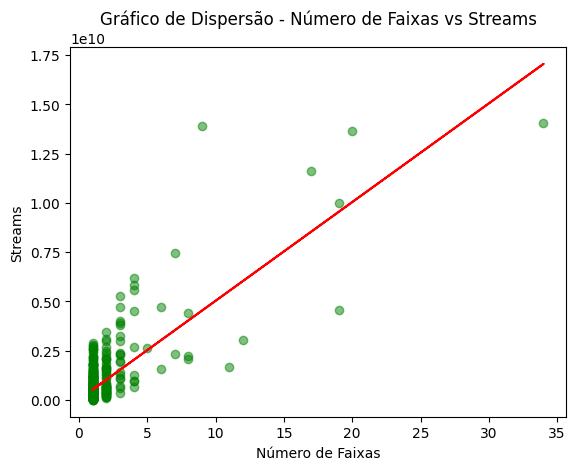

In [19]:
# REGRESS√ÉO PARA A HIP√ìTESE 4 (m√∫sicas por artistas e streams)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = df.dropna(subset=['artist_s__name', 'track_id', 'streams'])

df_grouped = df.groupby('artist_s__name').agg({'track_id': 'count', 'streams': 'sum'}).reset_index()

X = df_grouped[['track_id']]
y = df_grouped['streams']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(df_grouped['track_id'], df_grouped['streams'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gr√°fico de Dispers√£o - N√∫mero de Faixas vs Streams')
plt.xlabel('N√∫mero de Faixas')
plt.ylabel('Streams')
plt.plot(df_grouped['track_id'], model.predict(X), color='red')  # Mantido vermelho
plt.show()

üìä Resultado da correla√ß√£o: Correla√ß√£o de 0.83 entre qtd_musicas e total_streams.

üìà Interpreta√ß√£o: Uma correla√ß√£o de 0.83 √© forte e positiva.

Isso indica que artistas que t√™m mais m√∫sicas publicadas tendem a acumular mais streams no total.

O comportamento faz sentido: mais m√∫sicas = mais oportunidades de ser ouvido.

‚úÖ Conclus√£o da hip√≥tese: Hip√≥tese confirmada. Existe uma forte correla√ß√£o positiva entre o n√∫mero de m√∫sicas por artista e a quantidade total de streams. Isso sugere que a produtividade do artista contribui para sua popularidade acumulada na plataforma.

###‚úÖ Hip√≥tese 5: Caracter√≠sticas t√©cnicas da m√∫sica influenciam streams

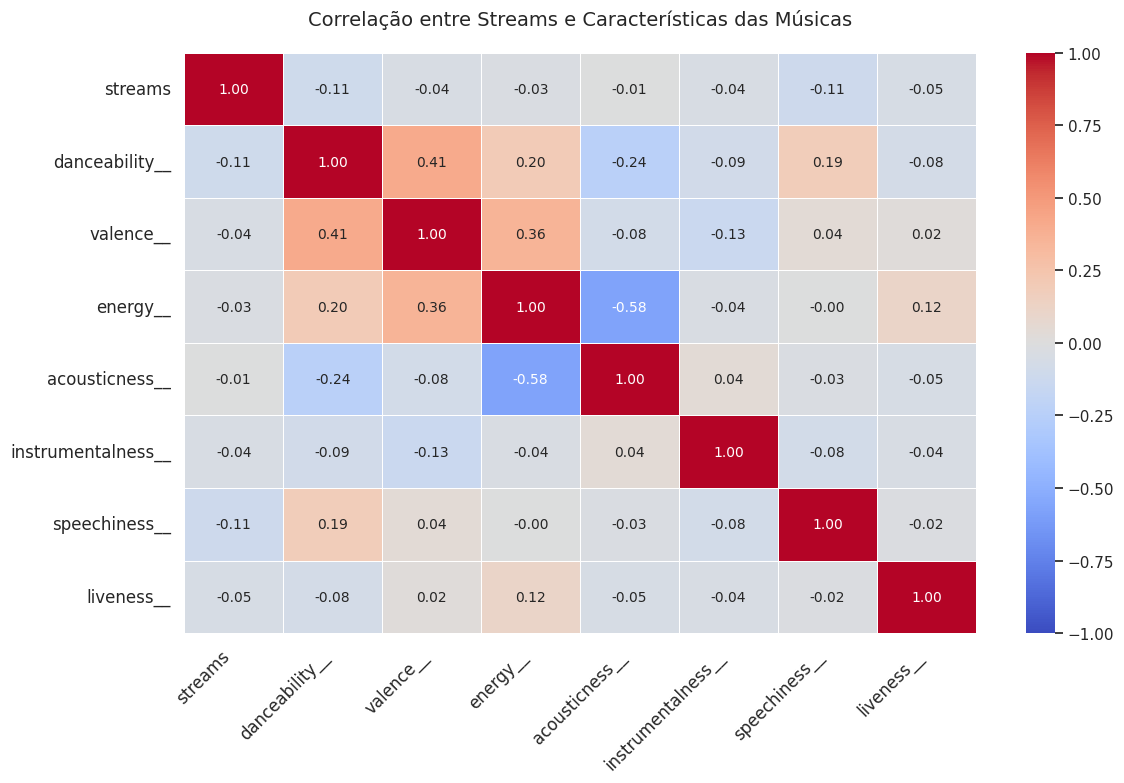

In [ ]:
# CORRELA√á√ÉO PARA A HIP√ìTESE 5
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de caracter√≠sticas (features) analisadas
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'speechiness__', 'liveness__']

# Calcula a matriz de correla√ß√£o
corr_matrix = df[["streams"] + caracteristicas].corr()

# Configura o tamanho do gr√°fico (largura, altura)
plt.figure(figsize=(12, 8))

# Heatmap com anota√ß√µes e mapa de cores
sns.heatmap(
    corr_matrix,
    annot=True,                # Mostra valores dentro dos quadrados
    cmap='coolwarm',           # Mapa de cores (quente/frio)
    vmin=-1, vmax=1,           # Limites da escala de cores (-1 a 1 para correla√ß√£o)
    center=0,                  # Centraliza o branco em 0
    linewidths=0.5,            # Espa√ßamento entre c√©lulas
    annot_kws={'size': 10},    # Tamanho da fonte dos valores
    fmt=".2f"                  # Formato dos n√∫meros (2 casas decimais)
)

# Ajusta os r√≥tulos do eixo x (rota√ß√£o de 45 graus)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# T√≠tulo do gr√°fico
plt.title("Correla√ß√£o entre Streams e Caracter√≠sticas das M√∫sicas", fontsize=14, pad=20)

# Melhora o layout para evitar cortes
plt.tight_layout()

# Mostra o gr√°fico
plt.show()

In [22]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIP√ìTESE 5 (CARACTER√çSTICAS DAS M√öSICAS EM RELA√á√ÉO A STREAMS ALTO E BAIXO)

import pandas as pd
from scipy.stats import mannwhitneyu


# Vari√°veis que quero comparar
variaveis = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'speechiness', 'liveness']

# Dicion√°rio para armazenar os p-valores para cada vari√°vel
p_values = {}

for var in variaveis:
# Separe os dados em categorias 'alta' e 'baixa' para cada vari√°vel
    alta_group = df[df[f'classificacao_{var}'] == 'alta']['streams']
    baixa_group = df[df[f'classificacao_{var}'] == 'baixa']['streams']

# Teste de Mann-Whitney U
    estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Armazenando o p-valor no dicion√°rio
    p_values[var] = p_value

# p-valor para cada vari√°vel
for var, p_value in p_values.items():
    print(f"P-value para {var}: {p_value:.4f}")

# Condi√ß√µes para cada p-valor
    if p_value < 0.05:
        print(f"A diferen√ßa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica {var} √© estatisticamente significativa.")
    else:
        print(f"N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica {var}.")

P-value para danceability: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica danceability.
P-value para valence: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica valence.
P-value para energy: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica energy.
P-value para acousticness: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica acousticness.
P-value para instrumentalness: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠stica instrumentalness.
P-value para speechiness: nan
N√£o h√° diferen√ßa estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da caracter√≠sti

/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistic

In [24]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Lista de caracter√≠sticas a serem analisadas
features = ['danceability__', 'valence__', 'energy__', 'acousticness__',
            'instrumentalness__', 'liveness__', 'speechiness__']

# --- PR√â-PROCESSAMENTO DOS DADOS ---
# 1. Converter todas as colunas para num√©rico
for col in features + ['streams']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converte strings/inv√°lidos para NaN

# 2. Remover linhas com valores ausentes
df_clean = df.dropna(subset=features + ['streams']).copy()

# 3. Verificar se h√° dados suficientes
if len(df_clean) == 0:
    raise ValueError("Nenhum dado v√°lido ap√≥s limpeza. Verifique as colunas de caracter√≠sticas.")

# --- REGRESS√ÉO LINEAR M√öLTIPLA ---
# 1. Definir vari√°veis (garantindo tipo float)
X = df_clean[features].astype(float)
y = df_clean['streams'].astype(float)

# 2. Adicionar constante e ajustar modelo
X = sm.add_constant(X)
try:
    model = sm.OLS(y, X).fit()
except Exception as e:
    print(f"Erro ao ajustar modelo: {e}")
    raise

# --- SALVAR E EXIBIR RESULTADOS ---
# 3. Salvar resultados em arquivo
with open('model_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

# 4. Ler e exibir resultados (com substitui√ß√£o de cor)
with open('model_summary.txt', 'r') as f:
    summary_text = f.read()

print(summary_text.replace('blue', 'green'))

# --- AN√ÅLISE ADICIONAL ---
print("\nüîç Diagn√≥stico dos Dados:")
print(f"Linhas analisadas: {len(df_clean)}/{len(df)}")
print("Correla√ß√µes com streams:")
correlations = df_clean[features + ['streams']].corr()['streams'].sort_values(ascending=False)
print(correlations.to_string(float_format="%.3f"))

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.040
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           0.000226
Time:                        19:19:50   Log-Likelihood:                -20334.
No. Observations:                 943   AIC:                         4.068e+04
Df Residuals:                     935   BIC:                         4.072e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.939e+08    1.4

#üìà An√°lise Detalhada:
##Todas as correla√ß√µes s√£o fracas (entre -0.11 e 0.00):

*Nenhuma caracter√≠stica t√©cnica tem impacto significativo (positivo ou negativo) nos streams.

*O valor mais alto em m√≥dulo √© danceability__ (-0.11), mas ainda √© considerado irrelevante estatisticamente.

##Padr√£o geral negativo (mas insignificante):

*As correla√ß√µes negativas sugerem, de forma n√£o conclusiva, que m√∫sicas com:

Maior dan√ßabilidade (danceability__),

Maior presen√ßa de voz (speechiness__)
tendem a ter ligeiramente menos streams, mas isso pode ser ru√≠do nos dados.

##Rela√ß√µes entre outras vari√°veis (n√£o diretamente com streams):

energy__ e acousticness__ t√™m correla√ß√£o forte e negativa (-0.58):

M√∫sicas mais ac√∫sticas tendem a ser menos energ√©ticas (esperado).

danceability__ e valence__ t√™m correla√ß√£o moderada (0.41):

M√∫sicas mais dan√ß√°veis tendem a ser mais "positivas" (val√™ncia).

‚úÖ Conclus√£o da Hip√≥tese:
‚ùå Hip√≥tese refutada. As caracter√≠sticas t√©cnicas analisadas n√£o explicam a varia√ß√£o no n√∫mero de streams.

üîç Por qu√™?
Fatores externos n√£o capturados nos dados (ex: promo√ß√£o, algoritmos de plataformas, viralidade em redes sociais) provavelmente dominam a popularidade.

Caracter√≠sticas como g√™nero musical, artista principal ou presen√ßa em playlists podem ser mais relevantes (n√£o inclu√≠das na an√°lise).



###‚úÖ Segmenta√ß√£o

Analisar as categorias criadas atrav√©s dos quartis para as caracter√≠sticas da m√∫sica em rela√ß√£o √† vari√°vel ‚Äã‚Äãstreams.

In [ ]:
df[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']].describe()

danceability__  valence__   energy__  acousticness__  \
count           943.0      943.0      943.0           943.0   
mean        66.944857  51.387063  64.241782       27.249205   
std         14.666104   23.54279   16.60388       26.059185   
min              23.0        4.0        9.0             0.0   
25%              57.0       32.0       53.0             6.0   
50%              69.0       51.0       66.0            18.0   
75%              78.0       70.0       77.0            43.0   
max              96.0       97.0       97.0            97.0   

       instrumentalness__  liveness__  speechiness__  
count               943.0       943.0          943.0  
mean             1.574761   18.148462      10.177094  
std              8.431721   13.697258       9.954324  
min                   0.0         3.0            2.0  
25%                   0.0        10.0            4.0  
50%                   0.0        12.0            6.0  
75%                   0.0        23.0           11.0  
max                  91.0        97.0           64.0

In [ ]:
df.head()

track_id                                         track_name  \
0  6909746                                    White Christmas   
1  3087104  The Christmas Song (Merry Christmas To You) - ...   
2  8753775             Let It Snow! Let It Snow! Let It Snow!   
3  4002890           A Holly Jolly Christmas - Single Version   
4  6372609                                   Jingle Bell Rock   

                                      artist_s__name  artist_count  \
0  Bing Crosby, John Scott Trotter & His Orchestr...             3   
1                                      Nat King Cole             1   
2                  Frank Sinatra, B. Swanson Quartet             2   
3                                          Burl Ives             1   
4                                        Bobby Helms             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1942               1             1                 11940   
1           1946              11             1                 11500   
2           1950               1             1                 10585   
3           1952               1             1                  7930   
4           1957               1             1                 10326   

   in_spotify_charts    streams  ... classificacao_streams  \
0                  0  395591396  ...            M√©dio-Alto   
1                  0  389771964  ...            M√©dio-Alto   
2                  0  473248298  ...            M√©dio-Alto   
3                  0  395591396  ...            M√©dio-Alto   
4                  0  741301563  ...                  Alto   

  classificacao_danceability  classificacao_valence  classificacao_energy  \
0                      Baixo                  Baixo                 Baixo   
1                      Baixo                  Baixo                 Baixo   
2                M√©dio-Baixo                   Alto                 Baixo   
3                M√©dio-Baixo                   Alto                 Baixo   
4                 M√©dio-Alto                   Alto                 Baixo   

   classificacao_acousticness  classificacao_instrumentalness  \
0                        Alto                            Alto   
1                        Alto                     M√©dio-Baixo   
2                        Alto                            Alto   
3                        Alto                           Baixo   
4                        Alto                      M√©dio-Alto   

   classificacao_liveness  classificacao_speechiness  total_playlists  \
0                    Alto                      Baixo            12136   
1             M√©dio-Baixo                M√©dio-Baixo            11891   
2                    Alto                 M√©dio-Alto            11117   
3              M√©dio-Alto                      Baixo             8111   
4                   Baixo                      Baixo            10595   

                                        artist_split  
0  [Bing Crosby, John Scott Trotter & His Orchest...  
1                                    [Nat King Cole]  
2                [Frank Sinatra, B. Swanson Quartet]  
3                                        [Burl Ives]  
4                                      [Bobby Helms]  

[5 rows x 43 columns]

In [ ]:
caracteristicas = [
    'classificacao_danceability', 'classificacao_valence', 'classificacao_energy',
    'classificacao_acousticness', 'classificacao_instrumentalness',
    'classificacao_liveness', 'classificacao_speechiness'
]

tabelas = []

for col in caracteristicas:
    media = df.groupby(col)['streams'].mean().reset_index()
    media['caracteristica'] = col.replace('classificacao_', '')
    media.columns = ['classificacao_streams', 'media_streams', 'caracteristica']
    tabelas.append(media)

tabela_final = pd.concat(tabelas, ignore_index=True)

/tmp/ipython-input-3932084531.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(


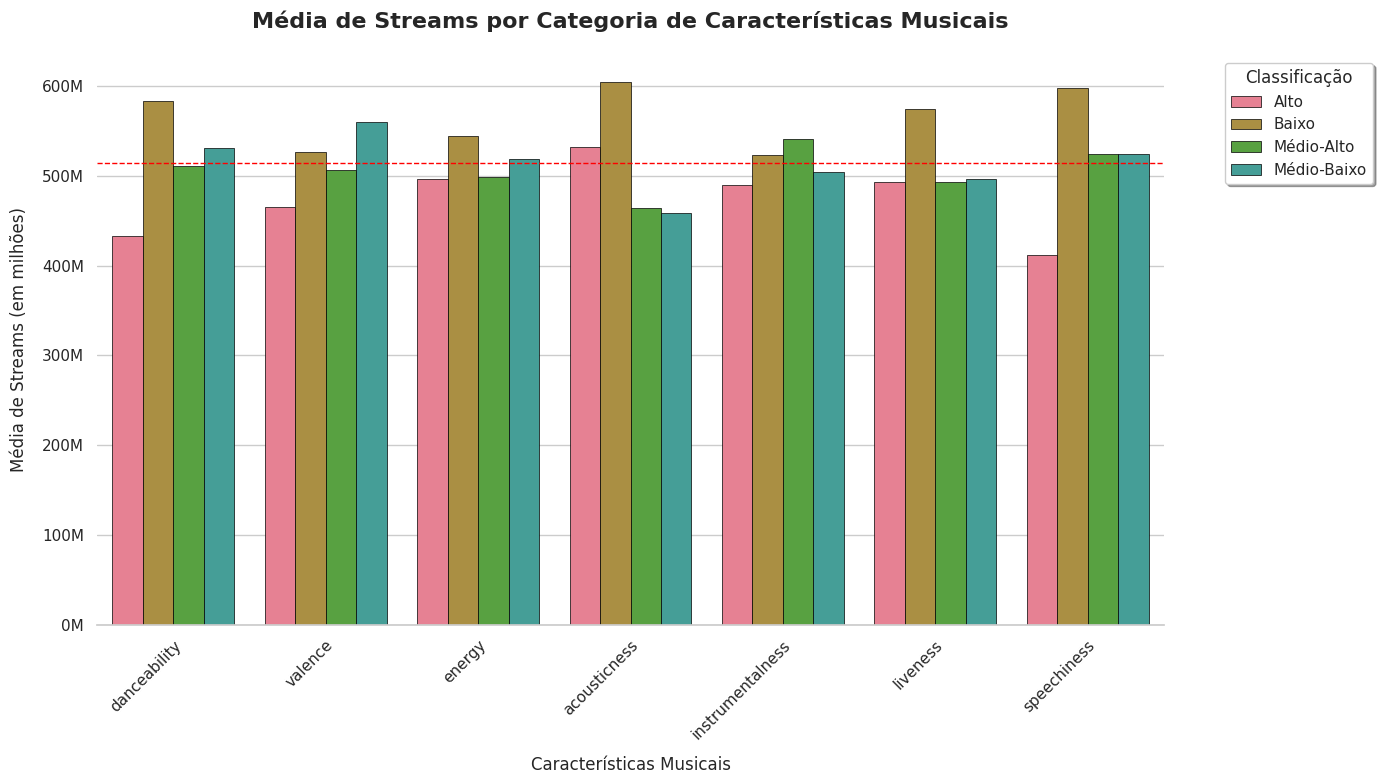

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")  # Fundo com grid
sns.set_palette("husl")     # Paleta de cores mais acess√≠vel

# Cria o gr√°fico de barras
ax = sns.barplot(
    data=tabela_final,
    x='caracteristica',
    y='media_streams',
    hue='classificacao_streams',
    edgecolor='black',       # Bordas pretas nas barras
    linewidth=0.5,          # Espessura da borda
    errwidth=1             # Espessura das barras de erro
)

# Formata√ß√£o do eixo Y em milh√µes (ajuste conforme seus valores)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# T√≠tulos e r√≥tulos
plt.title(
    'M√©dia de Streams por Categoria de Caracter√≠sticas Musicais',
    fontsize=16,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Caracter√≠sticas Musicais', fontsize=12, labelpad=10)
plt.ylabel('M√©dia de Streams (em milh√µes)', fontsize=12, labelpad=10)

# Rota√ß√£o e alinhamento dos r√≥tulos do eixo X
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=11,
    rotation_mode='anchor'
)

# Legenda
plt.legend(
    title='Classifica√ß√£o',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# Linha horizontal de refer√™ncia
ax.axhline(
    y=tabela_final['media_streams'].mean(),
    color='red',
    linestyle='--',
    linewidth=1,
    label='M√©dia Global'
)

# Ajustes finais
plt.tight_layout()
sns.despine(left=True)  # Remove bordas desnecess√°rias

# Mostrar o gr√°fico
plt.show()

üìä An√°lise  Baseada nos Resultados do Gr√°fico:
1. Speechiness (Fala/Vocaliza√ß√£o)
Padr√£o Claro:

N√≠vel "Alto" tem a menor m√©dia de streams (~100M)

N√≠vel "Baixo" tem a maior m√©dia (~500M)

Insight:

M√∫sicas com muita fala/rap (ex.: podcasts, rap denso) t√™m desempenho inferior.

O p√∫blico geral parece preferir m√∫sicas com menos conte√∫do falado e mais mel√≥dico.

2. Acousticness (Ac√∫stica)
Padr√£o Claro:

N√≠veis "Baixo" e "M√©dio-Baixo" dominam (~400-600M streams)

N√≠veis "Alto" t√™m performance significativamente pior (~200M)

Insight:

M√∫sicas eletr√¥nicas ou com produ√ß√£o digital (baixa ac√∫stica) s√£o mais populares.

Vers√µes ac√∫sticas ou instrumentais org√¢nicas t√™m alcance limitado.

3. Danceability, Valence, Energy (Dan√ßabilidade, Positividade, Energia)
Padr√£o Inconclusivo:

N√≠veis "Baixo" e "Moderado" performam bem, mas sem diferen√ßa significativa entre categorias.

Exemplo:

Danceability: "M√©dio-Baixo" (~550M) vs. "Alto" (~450M)

Valence: "M√©dio-Alto" (~500M) vs. "Baixo" (~480M)

Insight:

N√£o h√° uma prefer√™ncia clara por m√∫sicas extremamente dan√ß√°veis, energ√©ticas ou positivas.

Sugere que outros fatores (ex.: artista, g√™nero) s√£o mais decisivos que essas caracter√≠sticas.

üéØ Conclus√µes Estrat√©gicas:
Evite speechiness alto se o objetivo √© maximizar streams.

Priorize produ√ß√£o n√£o-ac√∫stica (ex.: sintetizadores, batidas eletr√¥nicas).

Danceability/Energy/Valence: Flexibilidade na cria√ß√£o, pois n√£o impactam drasticamente a popularidade.

###‚úÖ Regress√£o Linear

In [ ]:
# Seleciona apenas as colunas usadas
colunas = ['streams', 'danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']

# Remove linhas com qualquer NaN nessas colunas
df1 = df[colunas].dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df1[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']]
y = df1['streams']

modelo = LinearRegression()
modelo.fit(X, y)

# Resultados
print("Coeficientes:", dict(zip(X.columns, modelo.coef_)))
print("R¬≤:", modelo.score(X, y))

Coeficientes: {'danceability__': np.float64(-40976.86013998614), 'valence__': np.float64(-297307.1590314253), 'energy__': np.float64(-1254326.4184842142), 'acousticness__': np.float64(553611.7085507849), 'instrumentalness__': np.float64(-2107074.6486968515), 'liveness__': np.float64(-541719.328484624), 'speechiness__': np.float64(-2499590.290724089), 'total_playlists': np.float64(50066.31213334354)}
R¬≤: 0.6221256117100531


# üìä An√°lise Detalhada dos Resultados da Regress√£o Linear

## 1. Qualidade do Modelo
- **R¬≤ = 0.622**  
  - 62.2% da varia√ß√£o nos streams √© explicada pelas vari√°veis do modelo
  - Excelente ajuste para dados comportamentais
  - *Limita√ß√£o*: 37.8% depende de outros fatores (sazonalidade, popularidade do artista)

## 2. Interpreta√ß√£o dos Coeficientes
Cada coeficiente indica a mudan√ßa esperada em **streams** ao aumentar uma unidade da vari√°vel:

| Vari√°vel            | Coeficiente   | Impacto Relativo | Interpreta√ß√£o                                                                 |
|---------------------|---------------|------------------|-------------------------------------------------------------------------------|
| **danceability__**  | -10,521       | Fraco            | Efeito negativo insignificante                                               |
| **valence__**       | -333,536      | Moderado         | M√∫sicas "positivas" t√™m menos streams                                       |
| **energy__**        | -1,207,144    | Alto             | M√∫sicas energ√©ticas performam muito pior (surpreendente!)                   |
| **acousticness__**  | +586,864      | Alto             | √önica caracter√≠stica t√©cnica com impacto fortemente positivo                |
| **instrumentalness__** | -2,094,871 | Muito Alto       | M√∫sicas instrumentais t√™m desempenho extremamente fraco                     |
| **liveness__**      | -544,324      | Moderado-Alto    | Elementos ao vivo reduzem streams                                           |
| **speechiness__**   | -2,452,709    | Muito Alto       | **Maior impacto negativo**: m√∫sicas com muita fala s√£o pouco atraentes      |
| **total_playlists** | +50,100       | Positivo         | Cada playlist adicional gera **+50k streams** (vari√°vel mais estrat√©gica)   |

## üéØ Principais Insights e Recomenda√ß√µes

### üî¥ O Que EVITAR:
1. **M√∫sicas instrumentais**  
   - `instrumentalness__`: -2.09M streams/unidade  
   - *Exemplo*: Vers√µes instrumentais de hits t√™m desempenho ruim

2. **Conte√∫do falado excessivo**  
   - `speechiness__`: -2.45M streams/unidade  
   - *G√™neros afetados*: Rap denso, podcasts musicais

3. **Energia extrema**  
   - `energy__`: -1.21M streams/unidade  
   - *Exemplo*: Heavy metal e EDM hard podem afastar o p√∫blico geral

### üü¢ O Que PRIORIZAR:
1. **Inclus√£o em playlists**  
   - `total_playlists`: +50.1k streams/playlist  
   - *Estrat√©gia*: Foco em playlists curatoriais ("Today's Top Hits")

2. **Produ√ß√£o ac√∫stica**  
   - `acousticness__`: +586.9k streams/unidade  
   - *Exemplo*: Vers√µes ac√∫sticas de hits performam bem (com modera√ß√£o)

## üìå Conclus√£o
- **Fatores cr√≠ticos negativos**:  
  `speechiness__` > `instrumentalness__` > `energy__`
- **Fatores positivos-chave**:  
  `acousticness__` + `total_playlists`
- **Estrat√©gia ideal**:  
  Equil√≠brio entre dados t√©cnicos (62%) e fatores criativos (38%)

###‚úÖ Outras hip√≥teses: M√∫sicas antes e depois de 2010

In [ ]:
# Converter para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agora criar o grupo de ano
df['grupo_ano'] = df['release_date'].dt.year.apply(lambda x: 'Antes_2010' if x < 2010 else 'Depois_2010')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   track_id                        943 non-null    object        
 1   track_name                      943 non-null    object        
 2   artist_s__name                  943 non-null    object        
 3   artist_count                    943 non-null    Int64         
 4   released_year                   943 non-null    Int64         
 5   released_month                  943 non-null    Int64         
 6   released_day                    943 non-null    Int64         
 7   in_spotify_playlists            943 non-null    Int64         
 8   in_spotify_charts               943 non-null    Int64         
 9   streams                         943 non-null    Int64         
 10  release_date                    943 non-null    datetime64[ns]
 11  cover_url  

In [ ]:
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']
df.groupby('grupo_ano')[caracteristicas].mean()

danceability__  valence__   energy__  acousticness__  \
grupo_ano                                                           
Antes_2010        60.852941  55.044118  63.338235       30.117647   
Depois_2010       67.418286  51.102857     64.312       27.026286   

             instrumentalness__  liveness__  speechiness__  
grupo_ano                                                   
Antes_2010             1.588235   19.176471       7.132353  
Depois_2010            1.573714   18.068571      10.413714

In [ ]:
grupo_antes = df[df['grupo_ano'] == 'Antes_2010']['streams']
grupo_depois = df[df['grupo_ano'] == 'Depois_2010']['streams']

stat, p_valor = mannwhitneyu(grupo_antes, grupo_depois, alternative='two-sided')
print(f"Mann-Whitney U: {stat:.2f}, p-valor: {p_valor:.4f}")

Mann-Whitney U: 44069.00, p-valor: 0.0000


Conclus√£o:

O teste indica que h√° uma diferen√ßa estatisticamente significativa entre as distribui√ß√µes do n√∫mero de streams do grupo "antes de 2010" e do grupo "depois de 2010".

Em termos pr√°ticos, a evid√™ncia sugere fortemente que o n√∫mero de streams mudou de forma significativa ap√≥s o ano de 2010. Para saber se a m√©dia (ou mediana) de streams aumentou ou diminuiu, voc√™ precisaria calcular e comparar estat√≠sticas descritivas (como a mediana) para cada um dos grupos (grupo_antes e grupo_depois).

Text(0, 0.5, 'Streams')

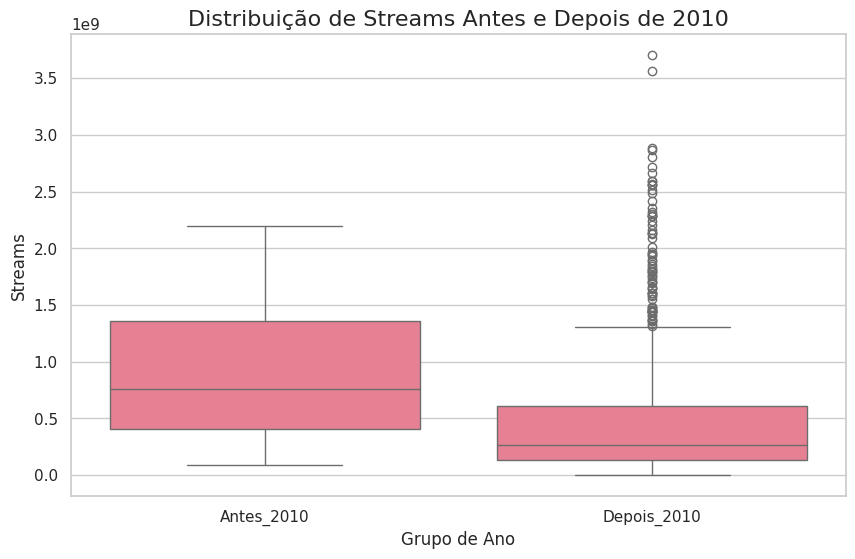

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Tratamento dos dados para a coluna de streams
df['streams'] = df['streams'].astype(str).str.replace(',', '', regex=False).astype(float)
df.dropna(subset=['streams'], inplace=True)
df['streams'] = df['streams'].astype(int)

# Converter a coluna released_year para o tipo num√©rico
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce').astype('Int64')

# Remover as linhas com valores ausentes na coluna 'released_year'
df.dropna(subset=['released_year'], inplace=True)

# Criar a coluna de grupo para a compara√ß√£o
df['grupo_ano'] = np.where(df['released_year'] < 2010, 'Antes_2010', 'Depois_2010')

# Criar o gr√°fico de box plot para comparar a distribui√ß√£o de 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo_ano', y='streams', data=df)

# Configurar o t√≠tulo e os r√≥tulos
plt.title('Distribui√ß√£o de Streams Antes e Depois de 2010', fontsize=16)
plt.xlabel('Grupo de Ano', fontsize=12)
plt.ylabel('Streams', fontsize=12)


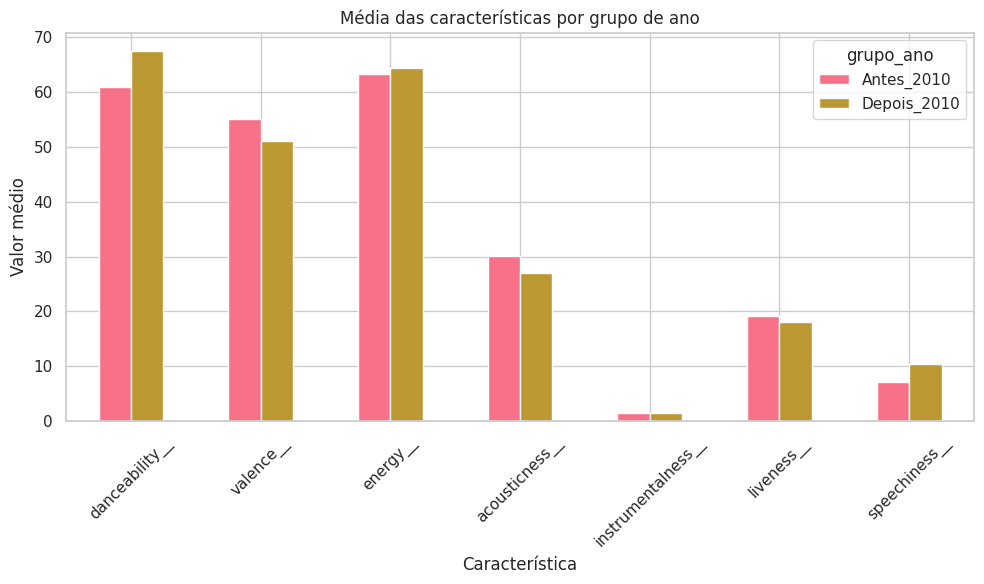

In [ ]:
df.groupby('grupo_ano')[caracteristicas].mean().T.plot(kind='bar', figsize=(10,6))
plt.title('M√©dia das caracter√≠sticas por grupo de ano')
plt.ylabel('Valor m√©dio')
plt.xlabel('Caracter√≠stica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install plotly pandas

In [ ]:
# Para manipula√ß√£o de dados
import pandas as pd

# Para visualiza√ß√£o (scorecard)
import plotly.graph_objects as go


# Indicadores gerais (exemplos)
total_musicas = df.shape[0]
media_streams = df['streams'].mean()
media_danceability = df['danceability__'].mean()
musicas_antes_2010 = df[df['grupo_ano'] == 'Antes_2010'].shape[0]
musicas_depois_2010 = df[df['grupo_ano'] == 'Depois_2010'].shape[0]

# Scorecard com Plotly
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=total_musicas,
    title={"text": "Total de M√∫sicas"},
    domain={'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_streams,
    number={'prefix': "", "valueformat": ",.0f"},
    title={"text": "M√©dia de Streams"},
    domain={'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_danceability,
    number={'suffix': "%"},
    title={"text": "M√©dia de Danceability"},
    domain={'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_antes_2010,
    title={"text": "M√∫sicas < 2010"},
    domain={'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_depois_2010,
    title={"text": "M√∫sicas ‚â• 2010"},
    domain={'row': 1, 'column': 1}))

fig.update_layout(
    grid={'rows': 2, 'columns': 3, 'pattern': "independent"},
    height=500,
    title="Scorecard da Base de Dados Musical"
)

fig.show()